In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        self.adjList = {}
        self.size = size

        # Adjacency Matrix
        for i in range(size):
            self.adjMatrix.append([float('inf') if i != j else 0 for j in range(size)])

        # Adjacency List 
        for i in range(size): 
            self.adjList[i] = []
        
    # Add edges
    def add_edge(self, v1, v2, weight):
        if v1 == v2:
            print("Same vertex {} and {}".format(v1, v2))
            return
        elif (v1 < 1) or (v2 < 1) or (v1 > self.size) or (v2 > self.size):
            print("Please enter vertex between 1 - {}".format(self.size))
            return
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = weight
        
        add = 1
        # Adjacency List 
        for item in self.adjList[v1-1]:
            if item[0] == v2-1: 
                add = 0

        if add: 
            self.adjList[v1-1].append((v2-1, weight))

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1-1][v2-1] == 0:
            print("No edge between {} and {}".format(v1, v2))
            return
        elif (v1 < 1) or (v2 < 1) or (v1 > self.size) or (v2 > self.size):
            print("Please enter vertex between 1 - {}".format(self.size))
            return
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = float('inf')

        # Adjacency List 
        for i, (vertex, weight) in enumerate(self.adjList[v1-1]):
            if vertex == v2-1:
                del self.adjList[v1-1][i]
                break

    def getSize(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val), end=" "),
            print("\n")

    def print_list(self): 
        for vertex in self.adjList:
            print("{} -> ".format(vertex+1), end=" ")
            for item in self.adjList[vertex]:
                print("{}".format((item[0]+1,item[1])), end=" ")
            print("\n")

    # Check if graph is strongly connected
    def is_strongly_connected(self):
        # Perform DFS from each vertex
        for start in range(self.size):
            visited = [False] * self.size
            self._dfs(start, visited)

            # Check if all vertices were visited
            if not all(visited):
                return False

        return True
    
    # Helper function for DFS
    def _dfs(self, vertex, visited):
        visited[vertex] = True
        for neighbor in self.adjList[vertex]:
            if not visited[neighbor[0] - 1]:
                self._dfs(neighbor[0] - 1, visited)

    def plot_graph(self):
        fig, ax = plt.subplots()
        
        # Create a directed graph
        G = nx.DiGraph()
        
        # Add nodes
        num_vertices = len(self.adjMatrix)
        nodes = range(num_vertices)
        G.add_nodes_from(nodes)
        
        # Add edges
        for i in range(num_vertices):
            for j in range(num_vertices):
                weight = self.adjMatrix[i][j]
                if weight != 0 and weight != float('inf'):
                    G.add_edge(i, j, weight=weight)
        
        # Get node positions using a circular layout
        pos = nx.circular_layout(G)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, ax=ax)
        
        # Draw node labels
        labels = {i: i+1 for i in range(num_vertices)} # node labels are 1-based indices
        nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='white', ax=ax)
        
        # Draw edges with arrows and weights
        for edge in G.edges():
            start = edge[0]
            end = edge[1]
            weight = G[start][end]['weight']
            # calculate shift in arrow direction for weight placement
            shift = np.array(pos[end]) - np.array(pos[start])
            shift *= 0.2
            # add arrow
            ax.annotate("",
                        xy=pos[end], xycoords='data',
                        xytext=pos[start], textcoords='data',
                        arrowprops=dict(arrowstyle="->", color="black",
                                        shrinkA=5, shrinkB=5,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=0.2",
                                        ),
                        )
            # add weight
            ax.annotate(weight,
                        xy=pos[start], xycoords='data',
                        xytext=pos[end]-shift, textcoords='data',
                        fontsize=12,
                        ha='center', va='center')
        
        # Set axis limits and remove ticks
        ax.set_xlim([-1.2, 1.2])
        ax.set_ylim([-1.2, 1.2])
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Show the plot
        plt.show()


class priority_queue(object): 
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        if not self.pq:
            self.pq.append((vertex, weight))
            self.len += 1
            return

        # Binary Search
        low, high = 0, self.len-1

        while low <= high:
            mid = (low + high) // 2
            if self.pq[mid][1] < weight:
                low = mid + 1
            else:
                high = mid - 1

        self.pq.insert(low, (vertex, weight))
        self.len += 1

    def remove(self, vertex): 
        for v in self.pq: 
            if v[0] == vertex: 
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        return self.pq[0]

    def printQueue(self):
        print(self.pq)



class priority_queue_heap(object):
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        heapq.heappush(self.pq, (weight, vertex))
        self.len += 1

    def remove(self, vertex):
        for v in self.pq:
            if v[1] == vertex:
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        self.len -= 1
        return heapq.heappop(self.pq)

    def printQueue(self):
        print(self.pq)


            

In [168]:
import random
def generate_graph(size, num_edges, sparse=True):
    graph = Graph(size)
    
    # generate dense graph
    if not sparse:
        edge_count = 0
        for i in range(size):
            for j in range(i+1, size):
                if edge_count < num_edges:
                    weight = random.randint(1, 100)
                    graph.add_edge(i+1, j+1, weight)
                    edge_count += 1
                else:
                    break
        return graph
    
    # generate sparse graph
    # set the number of edges for each vertex
    num_edges_per_vertex = num_edges // size

    for i in range(size):
        edges_added = 0
        while edges_added < num_edges_per_vertex:
            j = random.randint(1, size)
            if i+1 != j and graph.adjMatrix[i][j-1] == float('inf'):
                weight = random.randint(1, 100)
                graph.add_edge(i+1, j, weight)
                edges_added += 1
                
    return graph

In [230]:
import sys
def DijkstraAlgo_A(graph, source):
    d = []
    pi = []
    S = []
    pq = []
    
    # Initialization 
    for v in range(graph.getSize()):
        d.append(float('inf'))
        pi.append(0)
        S.append(None)
        # Push every vertex into priority queue using array
        pq.append((v, d[v]))
    pq[source-1] = (pq[source-1][0], 0)
    # Set source node 
    d[source-1] = 0

    while len(pq):
        u = -1
        # Get minimum weight (vertex, weight)
        weight = sys.maxsize
        for index in range(len(pq)): 
            if(pq[index][1] < weight and S[index] == None): 
                u = index
                weight = pq[index][1]
        if u == -1:
            break
        S[u] = 1
        for v in range(graph.getSize()):
            w = graph.adjMatrix[u][v]
            if ((w !=0) and 
                (w != float('inf')) and S[v] != 1):
                temp_weight = weight + w
                if temp_weight < d[v]:
                    # Update weight
                    d[v] = temp_weight 
                    pq[v] = (pq[v][0],temp_weight)


    return S, d, pi

In [102]:
def DijkstraAlgo_B(graph, source):
    d = [] # distance array
    pi = [] # predecessor array
    S = [] # visited array

    for v in range(graph.getSize()):
        d.append(float('inf'))
        pi.append(0)
        S.append(None)

    d[source-1] = 0

    # initialise priority queue: 
    pq = [(0,source-1)] 


    while pq:
            
            
            # Get vertex with minimum weight
            weight,u = heapq.heappop(pq) # Time Complexity = O(log|V|) * |V|

            # If vertex already visited continue to next iteration
            if (S[u] == 1):
                continue
            
            # Set vertex as visited
            S[u] = 1

            for v,weight in graph.adjList[u]:
                 
                 # If neighbour not visited and can minimize d[v]
                 if (S[v] != 1) and (d[v] > d[u] + weight):
                    d[v] = d[u] + weight
                    pi[v] = u+1 # Time Complexity = O(log|V|) * |E|

                    # Add updated vertex to priority queue
                    heapq.heappush(pq, (d[v], v))

    return S, d, pi

Same vertex 9 and 9
Same vertex 10 and 10


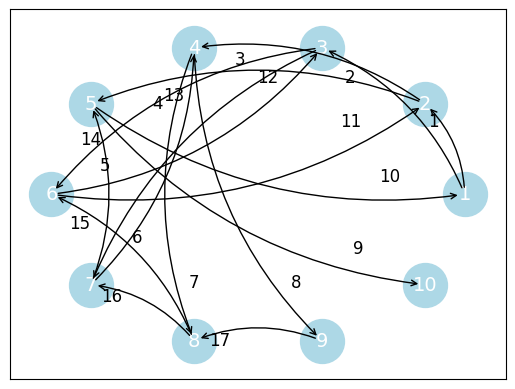

In [232]:
g = Graph(10)
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 2)
g.add_edge(2, 4, 3)
g.add_edge(2, 5, 4)
g.add_edge(3, 6, 5)
g.add_edge(3, 7, 6)
g.add_edge(4, 8, 7)
g.add_edge(4, 9, 8)
g.add_edge(5, 10, 9)
g.add_edge(5, 1, 10)
g.add_edge(6, 2, 11)
g.add_edge(6, 3, 12)
g.add_edge(7, 4, 13)
g.add_edge(7, 5, 14)
g.add_edge(8, 6, 15)
g.add_edge(8, 7, 16)
g.add_edge(9, 8, 17)
g.add_edge(9, 9, 18)
g.add_edge(10, 10, 19)

g.plot_graph()

In [233]:
sa,da,pa = DijkstraAlgo_A(g, 1)
sb,db,pb = DijkstraAlgo_B(g, 1)

print(da)
print(db)

#[(0, 0), (inf, 1), (inf, 2), (inf, 3), (inf, 4), (inf, 5), (inf, 6), (inf, 7), (inf, 8), (inf, 9)]


[0, 1, 2, inf, inf, inf, inf, inf, inf, inf]
[0, 1, 2, 4, 5, 7, 8, 11, 12, 14]


In [105]:
g = generate_random_graph(4)
g[0].plot_graph()
g[0].print_list()

TypeError: generate_random_graph() missing 1 required positional argument: 'edges'

In [ ]:
g[0].print_list()

1 ->  (2, 6) 

2 ->  (4, 4) 

3 ->  (1, 7) 

4 ->  (3, 2) 



10
30
50
70
90
110
130
150
170
190


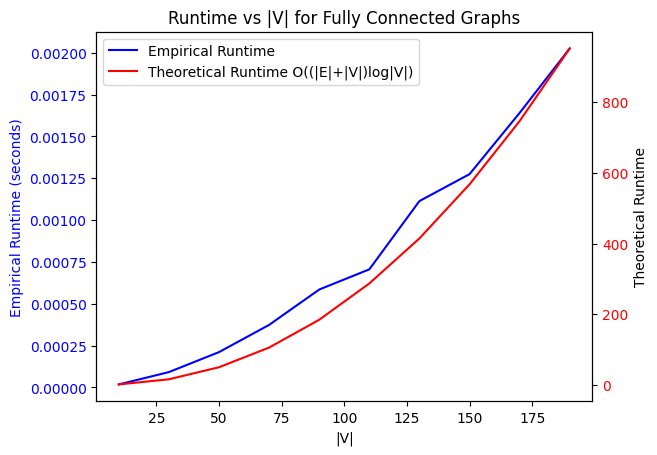

In [214]:
import math
import time, random, matplotlib.pyplot as plt 

sizes = range(10, 200, 20)
runtime = []
runtime_theory = []
edges_list = []
runs = 100   

for size in sizes: 
    edges = size * (size-1) / 2
    g = generate_graph(size,edges,sparse=False)
    elapsed_time = 0    
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        # print(S, d, pi)
        elapsed_time += time.time() - start_time 

    print(size)
    # print("Elapsed Time: {:2}s".format(elapsed_time))

    # Calculate the theoretical runtime
    edges_list.append(edges)
    runtime_theory.append(((size+edges)*math.log(size))/runs)
    runtime.append(elapsed_time/runs)

# Create a new figure with two subplots, sharing the x-axis
fig, ax1 = plt.subplots()

# plot the empirical runtime on the first axis
ax1.plot(sizes, runtime, label="Empirical Runtime", color="blue")
ax1.set_xlabel('|V|')
# ax1.set_xlabel('|E|')
ax1.set_ylabel('Empirical Runtime (seconds)', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title('Runtime vs |V| for Fully Connected Graphs')

# create a second y-axis on the right-hand side of the chart
ax2 = ax1.twinx()

# plot the theoretical runtime on the second axis
ax2.plot(sizes, runtime_theory, label="Theoretical Runtime O((|E|+|V|)log|V|)", color="red")
ax2.set_ylabel('Theoretical Runtime')
ax2.tick_params(axis='y', labelcolor="red")

# add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

# show the chart
plt.show()


In [ ]:
import math
import time, random, matplotlib.pyplot as plt 

sizes = range(10, 200, 10)
runtime = []
runtime_theory = []
edges_list = []
runs = 100   

for size in sizes: 
    edges = size * (size-1) / 2
    g = generate_graph(size,edges,sparse=True)
    elapsed_time = 0    
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        # print(S, d, pi)
        elapsed_time += time.time() - start_time 

    print(size)
    # print("Elapsed Time: {:2}s".format(elapsed_time))

    # Calculate the theoretical runtime
    edges_list.append(edges)
    runtime_theory.append(((size+edges)*math.log(size))/runs)
    runtime.append(elapsed_time/runs)

# Create a new figure with two subplots, sharing the x-axis
fig, ax1 = plt.subplots()

# plot the empirical runtime on the first axis
ax1.plot(sizes, runtime, label="Empirical Runtime", color="blue")
ax1.set_xlabel('|V|')
# ax1.set_xlabel('|E|')
ax1.set_ylabel('Empirical Runtime (seconds)', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title('Runtime vs |V| for Strongly Connected Graphs')

# create a second y-axis on the right-hand side of the chart
ax2 = ax1.twinx()

# plot the theoretical runtime on the second axis
ax2.plot(sizes, runtime_theory, label="Theoretical Runtime O((|E|+|V|)log|V|)", color="red")
ax2.set_ylabel('Theoretical Runtime')
ax2.tick_params(axis='y', labelcolor="red")

# add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

# show the chart
plt.show()


In [ ]:
print(edges_list)
print(sizes)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]
range(10, 1000, 10)


Same vertex 7 and 7


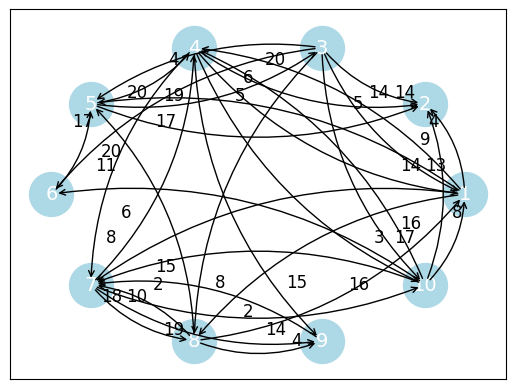

In [126]:
# generate graphs function that takes in vertices and edges
def generate_random_graph(vertices, edges):
    g = Graph(vertices)
    for _ in range(edges):
        v1 = random.randint(1, vertices)
        v2 = random.randint(1, vertices)
        weight = random.randint(1, 20)
        g.add_edge(v1, v2, weight)
    return g, edges

g,edges = generate_random_graph(10, 45)

g.plot_graph()


Same vertex 17 and 17
Same vertex 1 and 1
Same vertex 14 and 14
Same vertex 14 and 14
Same vertex 9 and 9
Same vertex 2 and 2
Same vertex 15 and 15
Same vertex 14 and 14
Same vertex 16 and 16
Same vertex 2 and 2
Same vertex 6 and 6
Same vertex 2 and 2
Same vertex 8 and 8
Same vertex 16 and 16
Same vertex 10 and 10
Same vertex 15 and 15
Same vertex 4 and 4
Same vertex 9 and 9
Same vertex 7 and 7
Same vertex 11 and 11
Same vertex 3 and 3
Same vertex 15 and 15
Same vertex 3 and 3
Same vertex 10 and 10
Same vertex 5 and 5
Same vertex 18 and 18
Same vertex 10 and 10
Same vertex 4 and 4
Same vertex 18 and 18
Same vertex 7 and 7
Same vertex 4 and 4
Same vertex 8 and 8
Same vertex 16 and 16
Same vertex 14 and 14
Same vertex 9 and 9
Same vertex 8 and 8
Same vertex 20 and 20
Same vertex 4 and 4
Same vertex 3 and 3
Same vertex 14 and 14
Same vertex 9 and 9
Same vertex 16 and 16
Same vertex 20 and 20
Same vertex 9 and 9
Same vertex 6 and 6
Same vertex 8 and 8
Same vertex 11 and 11
Same vertex 12 a

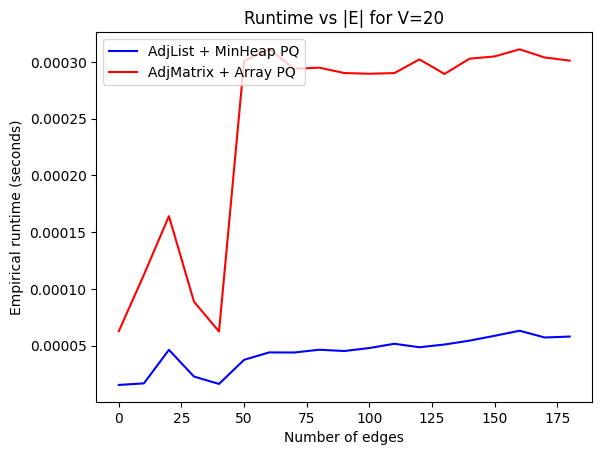

In [151]:
# plot graph of run time against edges using dijkstra A and dijkstra B functions with vertices fixed at 20
import math
import time, random, matplotlib.pyplot as plt

sizes = range(0, 190, 10)
runtimeB = []
runtimeA = []
runtime_theory = []
edges_list = []
runs = 100

for size in sizes: 
    g,edges = generate_random_graph(20, size)
    elapsed_timeB = 0    
    elapsed_timeA = 0
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        elapsed_timeB += time.time() - start_time 

        start_time = time.time()
        DijkstraAlgo_A(g, 1)
        elapsed_timeA += time.time() - start_time

    # Calculate the theoretical runtime
    runtime_theory.append(((size+20)*math.log(20))/runs)
    edges_list.append(edges)
    runtimeB.append(elapsed_timeB/runs)
    runtimeA.append(elapsed_timeA/runs)


# Create a new figure with two subplots, sharing the x-axis
fig, ax1 = plt.subplots()

# Plot the empirical runtime of algorithm B on the first axis
ax1.plot(sizes, runtimeB, label="AdjList + MinHeap PQ", color="blue")
ax1.plot(sizes, runtimeA, label="AdjMatrix + Array PQ", color="red")

# Set axis labels and tick colors
ax1.set_xlabel('Number of edges')
ax1.set_ylabel('Empirical runtime (seconds)', color="black")
ax1.tick_params(axis='y', labelcolor="black")

# Set chart title, legend and grid
ax1.set_title('Runtime vs |E| for V=20')
ax1.legend(loc='upper left')

# # create a second y-axis on the right-hand side of the chart
# ax2 = ax1.twinx()

# # plot the theoretical runtime on the second axis
# ax2.plot(sizes, runtime_theory, label="Theoretical Runtime O((|E|+|V|)log|V|)", color="red")
# ax2.set_ylabel('Theoretical Runtime')
# ax2.tick_params(axis='y', labelcolor="red")

# # add a legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines1 + lines2, labels1 + labels2)

# Show the chart
plt.show()

In [144]:
print(runtimeA)
print(runtimeB)

[0.0007619619369506836, 0.003036093711853027, 0.004401659965515137, 0.004796671867370606, 0.005209279060363769, 0.005270957946777344, 0.005350518226623535, 0.00547184944152832, 0.005483651161193847, 0.005492448806762695, 0.005581474304199219, 0.005366086959838867, 0.005447745323181152, 0.00569300651550293, 0.005674409866333008, 0.005874013900756836, 0.013005566596984864, 0.006037712097167969, 0.005520224571228027, 0.005645895004272461, 0.00603487491607666, 0.00583798885345459, 0.005760002136230469, 0.005878591537475586, 0.00564279556274414, 0.005517363548278809, 0.0058698892593383786, 0.0057599544525146484, 0.0056172370910644535, 0.005689215660095215, 0.005652785301208496, 0.005706191062927246, 0.00561826229095459, 0.005741500854492187, 0.005866813659667969, 0.005611872673034668, 0.0056624174118041996, 0.0058840751647949215, 0.005951046943664551, 0.006140685081481934, 0.00625300407409668, 0.0063528776168823246, 0.006020069122314453, 0.005828976631164551, 0.005931210517883301, 0.0057334

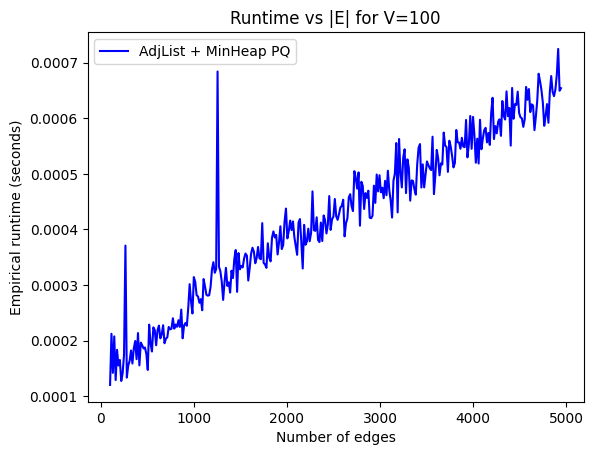

In [222]:
# plot graph of run time against edges using dijkstra A and dijkstra B functions with vertices fixed at 100
import math
import time, random, matplotlib.pyplot as plt
v = 100
max_edges = (v*(v-1)/2)
sizes = range(v, int(max_edges), 15)
runtimeB = []
runtimeA = []
runtime_theory = []
runs = 5

for size in sizes: 
    g = generate_graph(v, size, sparse=False)
    elapsed_timeB = 0 
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        elapsed_timeB += time.time() - start_time 

    # Calculate the theoretical runtime
    runtime_theory.append(((size+v)*math.log(v))/runs)
    runtimeB.append(elapsed_timeB/runs)


# Create a new figure with two subplots, sharing the x-axis
fig, ax1 = plt.subplots()

# Plot the empirical runtime of algorithm B on the first axis
ax1.plot(sizes, runtimeB, label="AdjList + MinHeap PQ", color="blue")

# Set axis labels and tick colors
ax1.set_xlabel('Number of edges')
ax1.set_ylabel('Empirical runtime (seconds)', color="black")
ax1.tick_params(axis='y', labelcolor="black")

# Set chart title, legend and grid
ax1.set_title(f'Runtime vs |E| for V={v}')
ax1.legend(loc='upper left')

# # create a second y-axis on the right-hand side of the chart
# ax2 = ax1.twinx()

# # plot the theoretical runtime on the second axis
# ax2.plot(sizes, runtime_theory, label="Theoretical Runtime O((|E|+|V|)log|V|)", color="red")
# ax2.set_ylabel('Theoretical Runtime')
# ax2.tick_params(axis='y', labelcolor="red")

# # add a legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines1 + lines2, labels1 + labels2)

# Show the chart
plt.show()

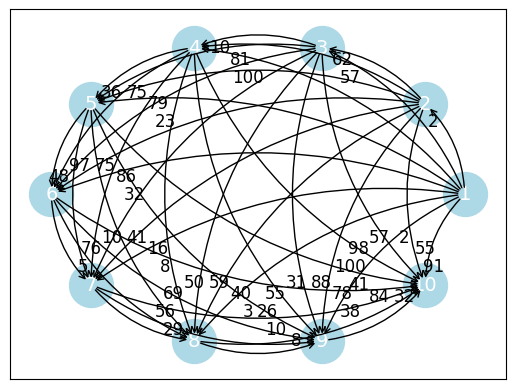

10 45


In [204]:
g = generate_graph(10, 45, sparse=False)
g.plot_graph()
edges = 0
vertices = 0
for u in g.adjList:
    vertices += 1
    edges += len(g.adjList[u])

print(vertices,edges)

In [154]:
def generate_graph(size, num_edges, sparse=True):
    graph = Graph(size)
    
    # generate dense graph
    if not sparse:
        edge_count = 0
        for i in range(size):
            for j in range(i+1, size):
                if edge_count < num_edges:
                    weight = random.randint(1, 100)
                    graph.add_edge(i+1, j+1, weight)
                    edge_count += 1
                else:
                    break
        return graph
    
    # generate sparse graph
    # set the number of edges for each vertex
    num_edges_per_vertex = num_edges // size

    for i in range(size):
        edges_added = 0
        while edges_added < num_edges_per_vertex:
            j = random.randint(1, size)
            if i+1 != j and graph.adjMatrix[i][j-1] == float('inf'):
                weight = random.randint(1, 100)
                graph.add_edge(i+1, j, weight)
                edges_added += 1
                
    return graph

10
10
20
20
30
30
40
40
50
50
60
60
70
70
80
80
90
90
100
100
110
110
120
120
130
130
140
140
150
150
160
160
170
170
180
180
190
190


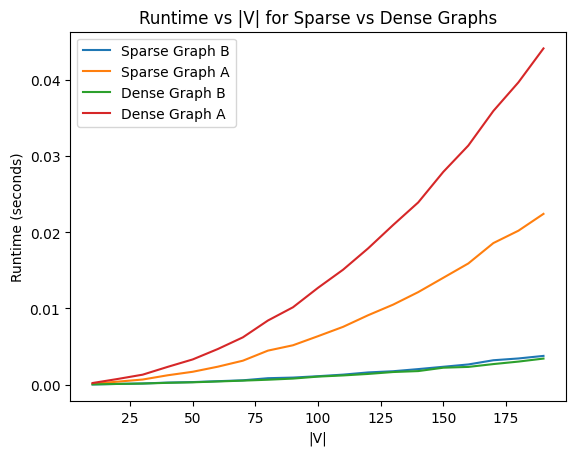

In [157]:
import time, random, matplotlib.pyplot as plt 


# Part A 
sizes = range(10, 200, 10)
runtime_dense = []
runtime_sparse = []

runtime_dense2 = []
runtime_sparse2 = []
runs = 100   

for size in sizes: 
    # g = generate_random_graph(size)

    edges = size * (size-1) / 2
    g = generate_graph(size, edges, sparse=True)
    elapsed_time = 0   
    elapsed_time2 = 0    
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        # print(S, d, pi)
        elapsed_time += time.time() - start_time 

        start_time = time.time()
        DijkstraAlgo_A(g, 1)
        elapsed_time2 += time.time() - start_time

    print(size)
    # print("Elapsed Time: {:2}s".format(elapsed_time))
    runtime_sparse.append(elapsed_time/runs)
    runtime_sparse2.append(elapsed_time2/runs)

    g = generate_graph(size, edges, sparse=False)
    elapsed_time = 0    
    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
        # print(S, d, pi)
        elapsed_time += time.time() - start_time 

        start_time = time.time()
        DijkstraAlgo_A(g, 1)
        elapsed_time2 += time.time() - start_time


    print(size)
    # print("Elapsed Time: {:2}s".format(elapsed_time))
    runtime_dense.append(elapsed_time/runs)
    runtime_dense2.append(elapsed_time2/runs)

# Plot the runtime against the vertex size
plt.plot(sizes, runtime_sparse, label="Sparse Graph B")
plt.plot(sizes, runtime_sparse2, label="Sparse Graph A")
plt.plot(sizes, runtime_dense, label="Dense Graph B")
plt.plot(sizes, runtime_dense2, label="Dense Graph A")
plt.xlabel('|V|')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs |V| for Sparse vs Dense Graphs')
plt.legend()
plt.show()

29
34
39
44
49
54
59
64
69
74
79
84
89
94
99
104
109
114
119
124
129
134
139
144
149
154
159
164
169
174
179
184
189
194
199
204
209
214
219
224
229
234
239
244
249
254
259
264
269
274
279
284
289
294
299
304
309
314
319
324
329
334
339
344
349
354
359
364
369
374
379
384
389
394
399
404
409
414
419
424
429
434


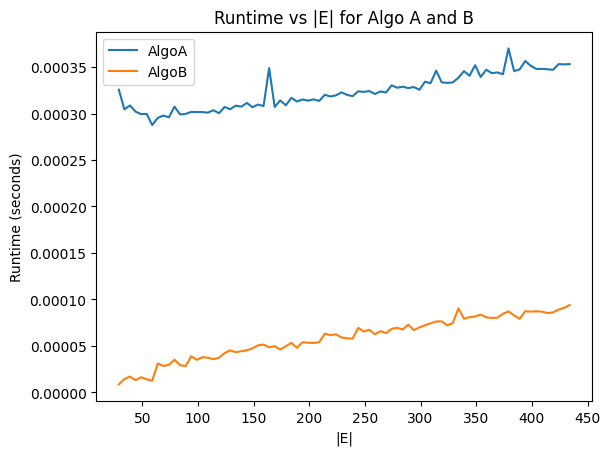

In [234]:
def part_c(): 
    import time, matplotlib.pyplot as plt
    v = 30

    edges = [i for i in range(v-1, int(v*(v-1)/2), 5)]

    runtime_a = []
    runtime_b = []

    for e in edges:
        g = generate_graph(v, e, True)

        runs = 350

        elapsed_time = 0    
            
        for _ in range(runs): 
            start_time = time.time()
            DijkstraAlgo_A(g, 1)
            # print(S, d, pi)
            elapsed_time += time.time() - start_time 
        runtime_a.append(elapsed_time/runs)

        elapsed_time = 0
        for _ in range(runs): 
            start_time = time.time()
            DijkstraAlgo_B(g, 1)
            # print(S, d, pi)
            elapsed_time += time.time() - start_time 

        runtime_b.append(elapsed_time/runs)
        print(e)

    # Plot the runtime against the vertex size
    plt.plot(edges, runtime_a, label="AlgoA")
    plt.plot(edges, runtime_b, label="AlgoB")
    plt.xlabel('|E|')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime vs |E| for Algo A and B')
    plt.legend()
    plt.show()

part_c()

NameError: name 'runtime_a' is not defined